# 문장 분류를 위한 합성곱 신경망
- 문장분류 (긍정인지 부정인지 이진분류)
- I am a teacher

In [ ]:
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense , BatchNormalization , Dropout, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D,ZeroPadding2D, Flatten, Input
from tensorflow.keras.layers     import Conv1D, MaxPooling1D, Embedding, Reshape, concatenate
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score



import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

# dataset
from tensorflow.keras.datasets.mnist import load_data
from sklearn.datasets                import load_digits
from tensorflow.keras.datasets             import imdb

- I am a teacher : 행렬에서 하나의 단어가 하나의 행을 차지하게 된다 → 4행의 행렬로 만들어짐.

- 합성곱의 연산은 단어와 단어로 이루어진다(행 단위)

In [ ]:
# num_words:빈도순으로 사위 몇개의 단어를 포함시킬 것인가를 결정
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words=3000)
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
# sequence_length: 각 문자의 최대 길이
sequence_length=300
X_train = pad_sequences(X_train, maxlen=sequence_length)
X_test = pad_sequences(X_test, maxlen=sequence_length)

X_train.shape, y_train.shape, X_test.shape,y_test.shape

((25000, 300), (25000,), (25000, 300), (25000,))

In [ ]:
# output_dim : 각 단어를 표현하는 벡터 공간의 크기
def cnn_sentence_conv1d():
  model = Sequential()

  model.add(Embedding(input_dim = 3000, output_dim = 100, input_length = sequence_length))
  model.add(Conv1D(kernel_size = 5, strides = 1,filters = 50, padding = 'valid'))
  model.add(MaxPooling1D(pool_size=2, padding='valid'))
  
  model.add(Flatten()) # 학습할 수 있는 노드와 연결이 가능하게 됨.
  model.add(Dense(10, activation =  'relu'))

  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(optimizer = Adam(learning_rate=0.001),
              loss ='binary_crossentropy', # 이진분류니까
              metrics = ['accuracy'])
  
  return model

In [ ]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((25000, 300), (25000,), (25000, 300), (25000,))

In [ ]:
model = cnn_sentence_conv1d()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          300000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 296, 50)           25050     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 148, 50)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                74010     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 399,071
Trainable params: 399,071
Non-trainable params: 0
________________________________________________

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
400/400 [==============================] - 41s 102ms/step - loss: 0.3591 - accuracy: 0.8441 - val_loss: 0.3156 - val_accuracy: 0.8694
Epoch 2/50
400/400 [==============================] - 40s 100ms/step - loss: 0.1888 - accuracy: 0.9255 - val_loss: 0.3207 - val_accuracy: 0.8664
Epoch 3/50
400/400 [==============================] - 40s 100ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.4284 - val_accuracy: 0.8544
Epoch 4/50
400/400 [==============================] - 40s 100ms/step - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.5722 - val_accuracy: 0.8636
Epoch 5/50
400/400 [==============================] - 40s 100ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.6291 - val_accuracy: 0.8652
Epoch 6/50
400/400 [==============================] - 40s 100ms/step - loss: 5.0122e-04 - accuracy: 1.0000 - val_loss: 0.6677 - val_accuracy: 0.8658
Epoch 7/50
400/400 [==============================] - 40s 100ms/step - loss: 2.2216e-04 - accuracy: 1.0000 - val_loss: 0.6998 

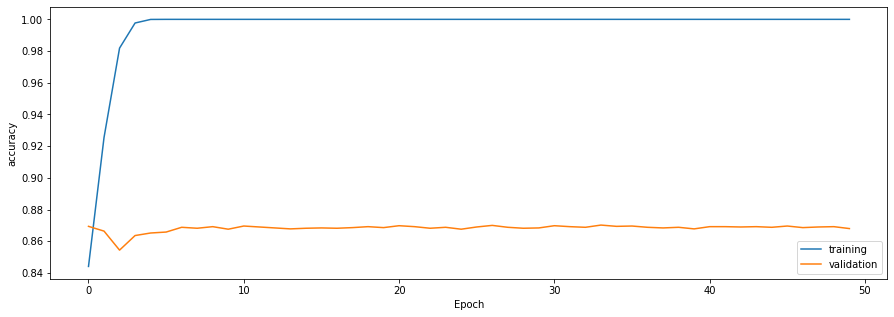

In [ ]:
# 모델 성능 시각화
plt. figure(figsize = (15,5))

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()
plt.close()

In [ ]:
def cnn_improve_sentence_conv2d() :
  model = Sequential()

  model.add( Embedding(input_dim=3000 , output_dim=100 , input_length=sequence_length) )
  model.add( Reshape( (300, 100, 1), input_shape=(300, 100) ))

  model.add( Conv2D(kernel_size= (5,100)  , strides= (1,1) ,  filters=50 , padding='valid') )
  model.add( GlobalMaxPooling2D()  )

  
  model.add( Dense(10) )
  model.add( Activation('relu') )
  model.add( Dropout(0.3) ) 

  model.add( Dense(10) )
  model.add( Activation('relu') )
  model.add( Dropout(0.3) ) 

  model.add( Dense(1  , activation='sigmoid') )

  model.compile(optimizer = Adam(learning_rate=0.001) , 
               loss = 'binary_crossentropy' , 
               metrics=['accuracy']) 
  
  return model

In [ ]:
model = cnn_improve_sentence_conv2d()

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
400/400 [==============================] - 54s 133ms/step - loss: 0.5729 - accuracy: 0.6784 - val_loss: 0.3661 - val_accuracy: 0.8496
Epoch 2/50
400/400 [==============================] - 53s 132ms/step - loss: 0.3474 - accuracy: 0.8685 - val_loss: 0.3017 - val_accuracy: 0.8790
Epoch 3/50
400/400 [==============================] - 53s 133ms/step - loss: 0.2576 - accuracy: 0.9107 - val_loss: 0.2955 - val_accuracy: 0.8848
Epoch 4/50
400/400 [==============================] - 52s 131ms/step - loss: 0.1917 - accuracy: 0.9384 - val_loss: 0.3188 - val_accuracy: 0.8818
Epoch 5/50
400/400 [==============================] - 52s 131ms/step - loss: 0.1283 - accuracy: 0.9617 - val_loss: 0.3674 - val_accuracy: 0.8784
Epoch 6/50
400/400 [==============================] - 52s 131ms/step - loss: 0.0901 - accuracy: 0.9747 - val_loss: 0.4778 - val_accuracy: 0.8822
Epoch 7/50
400/400 [==============================] - 52s 131ms/step - loss: 0.0784 - accuracy: 0.9779 - val_loss: 0.4635 - val_ac

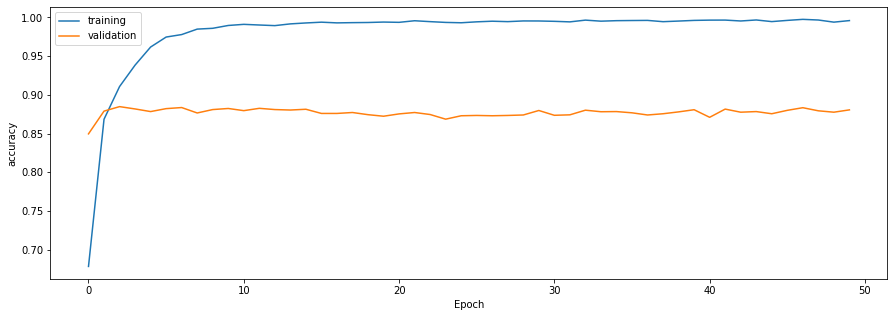

In [ ]:
# 모델 성능 시각화
plt. figure(figsize = (15,5))

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()
plt.close()

In [ ]:
sentence_result=model.evaluate(X_test,y_test)
print('accuracy : ', sentence_result[1])

782/782 [==============================] - 13s 16ms/step - loss: 1.3331 - accuracy: 0.8705
accuracy :  0.8705199956893921
